In [142]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [143]:
# read from results
RESULTS_PATH = "E:\\Facultate\\anul4\\IC\\proiect c++\\results"
files = os.listdir(RESULTS_PATH)

def sorted_path(path):
    return sorted(os.listdir(path), key = lambda x: int(x.split(".")[0].split("_")[1]))

E:\Facultate\anul4\IC\proiect c++\results\alpha_enron\alpha_100.txt
21
E:\Facultate\anul4\IC\proiect c++\results\alpha_enron\alpha_500.txt
21
E:\Facultate\anul4\IC\proiect c++\results\alpha_enron\alpha_1000.txt
21
E:\Facultate\anul4\IC\proiect c++\results\alpha_enron\alpha_3000.txt
21


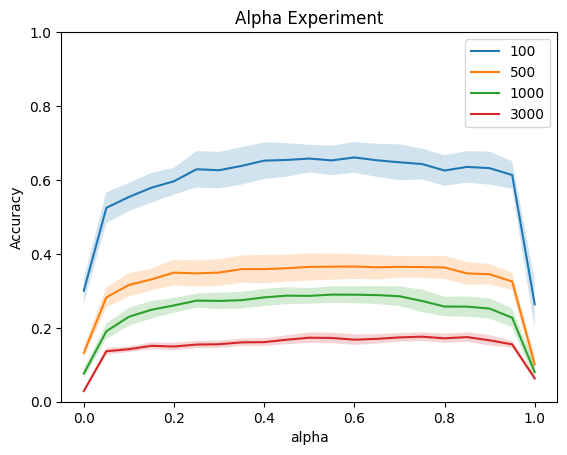

In [144]:
ALPHA_PATH = os.path.join(RESULTS_PATH, "alpha_enron")

for file in sorted_path(ALPHA_PATH):
    file_path = os.path.join(ALPHA_PATH, file)
    print(file_path)
    alphas = []
    means = []
    std_devs = []
    with open(file_path, 'r') as f:
        lines = f.readlines()
        name = lines[0]
        num_keywords, num_vals = tuple(lines[1].split(" "))
        for line in lines[2:]:
            values = line.rstrip().split(" ")
            alphas.append(float(values[0]))
            data = [float(x) for x in values[1:]]
            means.append(np.mean(data))
            std_devs.append(np.std(data))

    critical_value = 1.96
    n = len(alphas)
    print(n)
    means = np.array(means)
    margins = np.array(std_devs) * critical_value / np.sqrt(n)

    lower_bound = np.array(means) - margins
    upper_bound = np.array(means) + margins

    plt.plot(alphas, means, label = num_keywords)
    plt.fill_between(alphas, lower_bound, upper_bound, alpha=0.2)
    
plt.ylim(0, 1)
plt.title("Alpha Experiment")
plt.xlabel("alpha")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

    


E:\Facultate\anul4\IC\proiect c++\results\offset_enron\offset_100_100.txt
E:\Facultate\anul4\IC\proiect c++\results\offset_enron\offset_100_5.txt
E:\Facultate\anul4\IC\proiect c++\results\offset_enron\offset_500_100.txt
E:\Facultate\anul4\IC\proiect c++\results\offset_enron\offset_500_5.txt
E:\Facultate\anul4\IC\proiect c++\results\offset_enron\offset_1000_100.txt
E:\Facultate\anul4\IC\proiect c++\results\offset_enron\offset_1000_5.txt


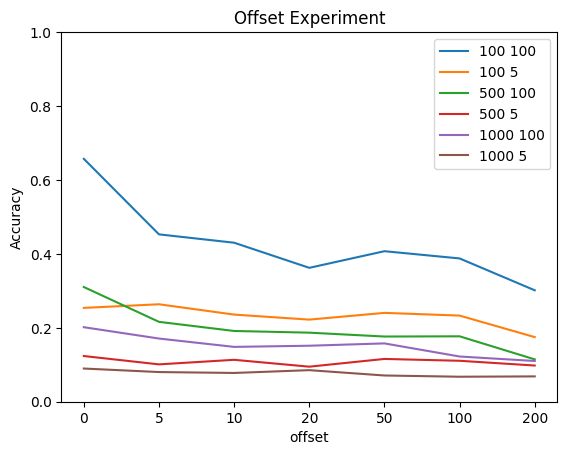

In [148]:
OFFSET_PATH = os.path.join(RESULTS_PATH, "offset_enron")

for file in sorted_path(OFFSET_PATH):
    file_path = os.path.join(OFFSET_PATH, file)
    print(file_path)
    offsets = []
    means = []
    std_devs = []
    with open(file_path, 'r') as f:
        lines = f.readlines()
        name = lines[0]
        num_keywords, num_queries, num_vals = tuple(lines[1].split(" "))
        for line in lines[2:]:
            values = line.rstrip().split(" ")
            offsets.append(values[0])
            data = [float(x) for x in values[1:]]
            means.append(np.mean(data))
            std_devs.append(np.std(data))

    critical_value = 1.96
    n = len(offsets)
    means = np.array(means)
    margins = np.array(std_devs) * critical_value / np.sqrt(n)

    lower_bound = np.array(means) - margins
    upper_bound = np.array(means) + margins

    plt.plot(offsets, means, label = num_keywords + " " + num_queries)
    #plt.fill_between(offsets, lower_bound, upper_bound, alpha=0.2)

plt.ylim(0, 1)
plt.title("Offset Experiment")
plt.xlabel("offset")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

E:\Facultate\anul4\IC\proiect c++\results\quantity_enron\quantity_100.txt
E:\Facultate\anul4\IC\proiect c++\results\quantity_enron\quantity_300.txt
E:\Facultate\anul4\IC\proiect c++\results\quantity_enron\quantity_600.txt
E:\Facultate\anul4\IC\proiect c++\results\quantity_enron\quantity_1000.txt
E:\Facultate\anul4\IC\proiect c++\results\quantity_enron\quantity_1500.txt


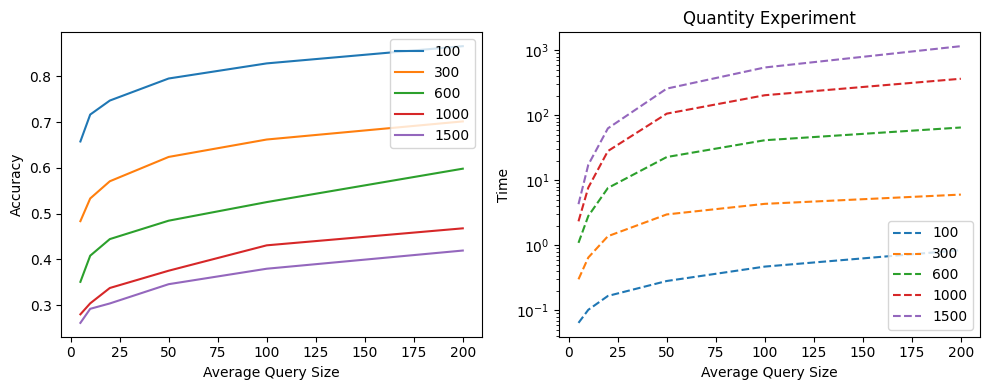

In [151]:
QUANTITY_PATH = os.path.join(RESULTS_PATH, "quantity_enron")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax2.set_yscale('log')
for file in sorted_path(QUANTITY_PATH):
    file_path = os.path.join(QUANTITY_PATH, file)
    print(file_path)
    offsets = []
    acc_means = []
    time_means = []
    with open(file_path, 'r') as f:
        lines = f.readlines()
        name = lines[0]
        num_keywords, num_vals = tuple(lines[1].split(" "))
        for line_acc, line_time in zip(lines[2::2], lines[3::2]):
            values = line_acc.rstrip().split(" ")
            offsets.append(int(values[0]))
            acc_values = [float(x) for x in values[1:]]
            time_values = [float(x) for x in line_time.rstrip().split(" ")]
            acc_means.append(np.mean(acc_values))
            time_means.append(np.mean(time_values))

    ax1.plot(offsets, acc_means, label=num_keywords)
    ax2.plot(offsets, time_means, label=num_keywords, linestyle='dashed')
    

ax1.set_xlabel("Average Query Size")
ax1.set_ylabel("Accuracy")
ax2.set_xlabel("Average Query Size")
ax2.set_ylabel("Time")
ax1.legend()
ax2.legend()
plt.title("Quantity Experiment")
plt.tight_layout()
plt.show()

E:\Facultate\anul4\IC\proiect c++\results\defense_enron\defense_100_clrz.txt
clrz
E:\Facultate\anul4\IC\proiect c++\results\defense_enron\defense_100_default.txt
default
E:\Facultate\anul4\IC\proiect c++\results\defense_enron\defense_500_CLRZ.txt
CLRZ
E:\Facultate\anul4\IC\proiect c++\results\defense_enron\defense_500_default.txt
default
{'100': {0.0: [0.494071, 0.731818, 0.633962, 0.576336, 0.632576, 0.641921, 0.862903, 0.702703, 0.589091, 0.663717, 0.704453, 0.660377]}, '500': {0.0: [0.383399, 0.3, 0.362264, 0.270992, 0.234848, 0.371179, 0.516129, 0.343629, 0.294545, 0.336283, 0.522267, 0.441509]}}
{'100': {0.01: [0.395257, 0.422727, 0.354717, 0.374046, 0.162879, 0.327511, 0.346774, 0.474903, 0.421818, 0.504425, 0.0850202, 0.554717], 0.05: [0.494071, 0.468182, 0.226415, 0.232824, 0.231061, 0.305677, 0.379032, 0.482625, 0.436364, 0.495575, 0.0850202, 0.513208], 0.1: [0.403162, 0.490909, 0.456604, 0.206107, 0.223485, 0.336245, 0.197581, 0.378378, 0.36, 0.557522, 0.0202429, 0.509434]}, 

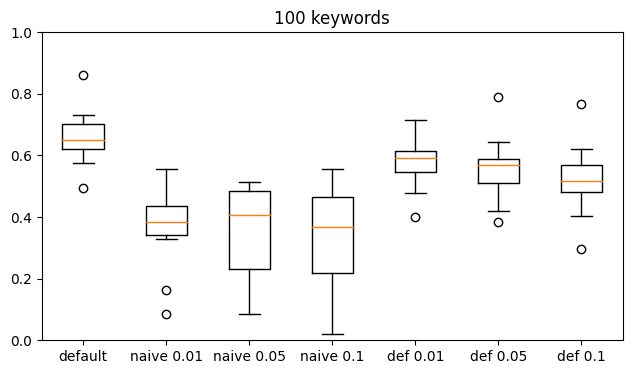

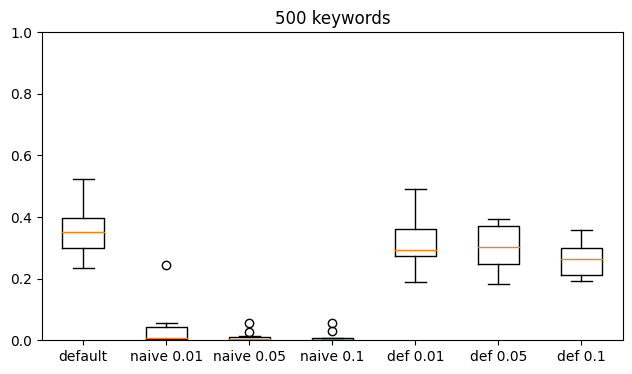

In [147]:
DEFENSE_PATH = os.path.join(RESULTS_PATH, "defense_enron")


default_vals = {}
naive_vals = {}
defense_vals = {}



for file in sorted_path(DEFENSE_PATH):
    file_path = os.path.join(DEFENSE_PATH, file)
    print(file_path)
    with open(file_path, 'r') as f:
        lines = f.readlines()
        name = lines[0]
        num_keywords, num_vals = tuple(lines[1].split(" "))
        f_type = file.split(".")[0].split("_")[-1]
        print(f_type)
        if num_keywords not in default_vals:
            default_vals[num_keywords] = {}
        if f_type == "default":
            naive_vals[num_keywords] = {}
        else:
            defense_vals[num_keywords] = {}
        for line in lines[2:]:
            values = line.rstrip().split(" ")
            FPR = float(values[0])
            data = [float(x) for x in values[1:]]
            if FPR == 0.0:
                default_vals[num_keywords][FPR] = data
            elif f_type == "default":
                naive_vals[num_keywords][FPR] = data
            else:
                defense_vals[num_keywords][FPR] = data

print(default_vals)
print(naive_vals)
print(defense_vals)




for k in naive_vals:
    l = [default_vals[k][0]]
    for fpr in naive_vals[k]:
        l.append(naive_vals[k][fpr])
    for fpr in defense_vals[k]:
        l.append(defense_vals[k][fpr])
    ticks = ["default"] + ["naive " + str(fpr) for fpr in naive_vals[k]] + ["def " + str(fpr) for fpr in defense_vals[k]]
    
    fig, ax = plt.subplots(figsize=(7.5, 4))
    
    ax.boxplot(l)
    plt.ylim(0, 1)
    plt.xticks(range(1, len(l) + 1), ticks)
    plt.title(k + " keywords")
    plt.show()




